In [1]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from matplotlib import pyplot as plt
import pandas as pd

/var/folders/7n/3yyl23c10zb7cnym2_pvnsgw0000gn/T/ipykernel_46614/4066914397.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [2]:
labels_skip_4 = ["Baseline", "Skip 1RS", "Skip 2RS", "Skip 1RS1AG", "Progressive"]
labels_skip_8 = ["Baseline", "Skip 2RS", "Skip 4RS", "Skip 2RS2AG", "Progressive"]
labels_random = ["Baseline", "25% Random", "50% Random", "75% Random", "90% Random"]
labels_adaptive = ["Baseline", "In order", "Reverse order", "Hybrid"]

In [3]:
def get(path, labels):
    df = pd.read_csv(path)
    data = [df[l].to_numpy() for l in labels]
    return data,labels

In [4]:
def plot_resnet(data, labels, savepath):
    fig,ax1 = plt.subplots(figsize=(10,5), facecolor='white')
    ax2 = ax1.inset_axes((0.4, 0.2, 0.25, 0.3))

    x1, x2, y1, y2 = 185, 201, 83, 93
    ax2.set_xlim(x1, x2)
    ax2.set_ylim(y1, y2)
    ax2.set_xticklabels([185 ,190, 195, 200])
    # ax2.set_yticklabels([88, 89, 90])

    mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='gray', zorder=3, linewidth=2, linestyle="dashed")
    
    #plt.tight_layout()
    plt.xlabel("Epoch", fontsize=16)
    plt.grid()
    plt.ylabel("Test Accuracy,%", fontsize=16)
    #plt.title("ResNet50 Adaptive", fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    plt.ylim(0, 100)
    
    xaxis = [i*5 for i in range(1, 41)]

    markers = ["o", "^", "s", "p", "*"]

    for i in range(len(labels)):
        ax1.plot(xaxis, data[i], label=labels[i], marker=markers[i], markersize=5)
        ax2.plot(xaxis, data[i], label=labels[i], marker=markers[i], markersize=5)

    plt.legend(fontsize=14) 
    plt.savefig(savepath, dpi=600, bbox_inches="tight")

/var/folders/7n/3yyl23c10zb7cnym2_pvnsgw0000gn/T/ipykernel_43960/3542129210.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([185 ,190, 195, 200])


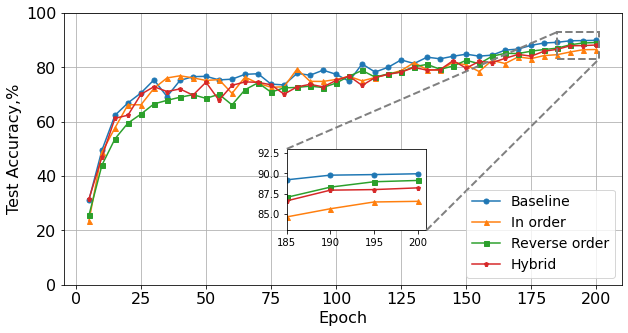

In [62]:
data,labels = get("./data/adaptive/resnet50.csv", labels_adaptive)
plot_resnet(data, labels, "./figures/adaptive/resnet.png")

In [67]:
def plot_vgg(data, labels, savepath):
    fig,ax1 = plt.subplots(figsize=(10,5), facecolor='white')
    ax2 = ax1.inset_axes((0.4, 0.2, 0.25, 0.3))

    x1, x2, y1, y2 = 186, 201, 84, 94
    ax2.set_xlim(x1, x2)
    ax2.set_ylim(y1, y2)
    #ax2.set_yticks([85,86,87,88,89,90,91])
    ax2.set_xticklabels(["",190,195, 200, 195, "", 200])
    #ax2.set_yticklabels([89, 90, 91, 92])

    mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='gray', zorder=3, linewidth=2, linestyle="dashed")
    
    #plt.tight_layout()
    plt.xlabel("Epoch", fontsize=16)
    plt.grid()
    plt.ylabel("Test Accuracy,%", fontsize=16)
    #plt.title("VGG16 Adaptive", fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    plt.ylim(0, 100)
    
    xaxis = [i*5 for i in range(1,41)]

    markers = ["o", "^", "s", "p", "*"]

    for i in range(len(labels)):
        ax1.plot(xaxis, data[i], label=labels[i], marker=markers[i], markersize=5)
        ax2.plot(xaxis, data[i], label=labels[i], marker=markers[i], markersize=5)

    plt.legend(fontsize=14) 
    plt.savefig(savepath, dpi=600, bbox_inches="tight")

/var/folders/7n/3yyl23c10zb7cnym2_pvnsgw0000gn/T/ipykernel_43960/651400509.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["",190,195, 200, 195, "", 200])


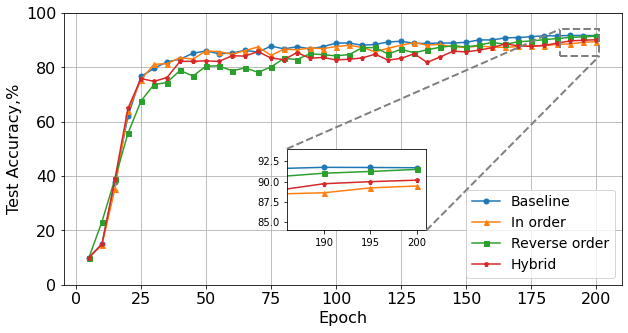

In [68]:
data,labels = get("./data/adaptive/vgg16.csv", labels_adaptive)
plot_vgg(data, labels, "./figures/adaptive/vgg.png")

In [69]:
def plot_yolo(data, labels, savepath):
    fig,ax1 = plt.subplots(figsize=(10,5), facecolor='white')
    ax2 = ax1.inset_axes((0.5, 0.20, 0.2, 0.25))

    x1, x2, y1, y2 = 580, 601, 65, 74
    ax2.set_xlim(x1, x2)
    ax2.set_ylim(y1, y2)
    # ax2.set_xticklabels([195,200])
    # ax2.set_yticklabels([89, 90, 91, 92])

    mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='gray', linewidth=2, linestyle="dashed")
    
    #plt.tight_layout()
    plt.xlabel("Epoch", fontsize=16)
    plt.grid()
    plt.ylabel("mAP Score", fontsize=16)
    #plt.title("YOLO Adaptive", fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    plt.ylim(0, 100)
    
    xaxis = [i*10 for i in range(61)]

    markers = ["o", "^", "s", "p", "*"]

    for i in range(len(labels)):
        ax1.plot(xaxis, data[i]*100, label=labels[i], marker=markers[i], markersize=5)
        ax2.plot(xaxis, data[i]*100, label=labels[i], marker=markers[i], markersize=5)

    plt.legend(fontsize=14) 
    plt.savefig(savepath, dpi=600, bbox_inches="tight")

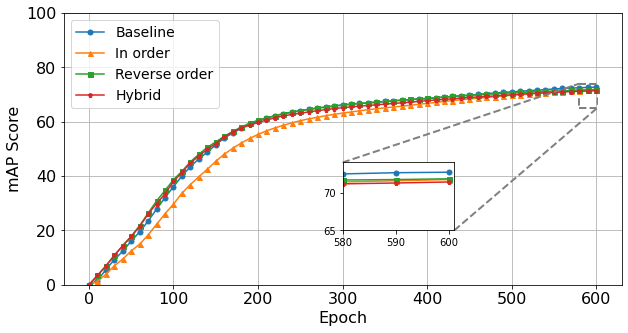

In [70]:
data,labels = get("./data/adaptive/yolo.csv", labels_adaptive)
plot_yolo(data,labels, "./figures/adaptive/yolo.png")

In [5]:
def plot_bert4(data, labels, savepath):
    fig,ax1 = plt.subplots(figsize=(10,5), facecolor='white')
    # ax2 = ax1.inset_axes((0.3, 0.20, 0.4, 0.45))

    # x1, x2, y1, y2 = 36, 41, 85, 91
    # ax2.set_xlim(x1, x2)
    # ax2.set_ylim(y1, y2)
    # ax2.set_xticklabels(["", "", "", "", 3])
    # # ax2.set_yticklabels([89, 90, 91, 92])

    # mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='gray')
    
    #plt.tight_layout()
    plt.xlabel("Epoch", fontsize=16)
    plt.xticks(ticks=[0, 14, 28, 40], labels=[0,1,2,3])
    plt.grid()
    plt.ylabel("F1 Score", fontsize=16)
    #plt.title("YOLO Adaptive", fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    plt.ylim(0, 100)
    
    #xaxis = [i*10 for i in range(41)]

    markers = ["o", "^", "s", "p", "*"]

    for i in range(len(labels)):
        ax1.plot(data[i], label=labels[i], marker=markers[i], markersize=5)
        #ax2.plot(data[i], label=labels[i], marker=markers[i], markersize=5)

    plt.legend(fontsize=14) 
    plt.savefig(savepath, dpi=600, bbox_inches="tight")

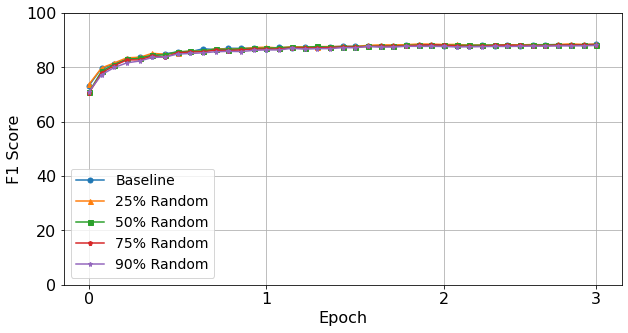

In [6]:
data,labels = get("./data/random/bert.csv", labels_random)
plot_bert4(data, labels, "./figures/random/bert.png")

In [63]:
def plot_bert8(data, labels, savepath):
    fig,ax1 = plt.subplots(figsize=(10,5), facecolor='white')
    ax2 = ax1.inset_axes((0.4, 0.20, 0.4, 0.45))

    x1, x2, y1, y2 = 17, 19.5, 85, 91
    ax2.set_xlim(x1, x2)
    ax2.set_ylim(y1, y2)
    ax2.set_xticklabels(["", "", "", "", 3])
    # ax2.set_yticklabels([89, 90, 91, 92])

    mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='gray')
    
    #plt.tight_layout()
    plt.xlabel("Epoch", fontsize=16)
    plt.xticks(ticks=[0, 6, 13, 19], labels=[0,1,2,3])
    plt.grid()
    plt.ylabel("F1 Score", fontsize=16)
    #plt.title("YOLO Adaptive", fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    plt.ylim(0, 100)
    
    #xaxis = [i*10 for i in range(41)]

    markers = ["o", "^", "s", "p", "*"]

    for i in range(len(labels)):
        ax1.plot(data[i], label=labels[i], marker=markers[i], markersize=5)
        ax2.plot(data[i], label=labels[i], marker=markers[i], markersize=5)

    plt.legend(fontsize=14) 
    plt.savefig(savepath, dpi=600, bbox_inches="tight")

/var/folders/7n/3yyl23c10zb7cnym2_pvnsgw0000gn/T/ipykernel_37832/2308537021.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", "", "", "", 3])


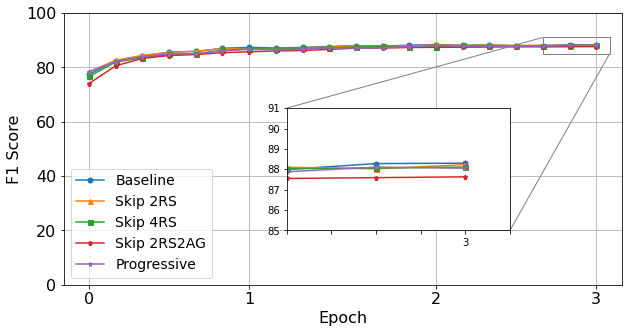

In [64]:
data,labels = get("./data/skipreduce/bert_8.csv", labels_skip_8)
plot_bert8(data, labels, "./figures/skipreduce/bert_8_zoomed.png")